In [2]:
import numpy as np
from matplotlib.pyplot import *
import cv2

True

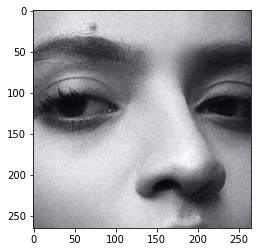

In [20]:
image = imread ('../data/imgs/girl.jpg')

imshow (image, cmap = "gray")

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

image = rgb2gray (image)

cv2.imwrite ('face.jpg', image)

In [27]:
import argparse

def main():
    parser = argparse.ArgumentParser(description = "Generate images with the GANformer")
    parser.add_argument("--model",              help = "Filename for a snapshot to resume", type = str)
    parser.add_argument("--gpus",               help = "Comma-separated list of GPUs to be used (default: %(default)s)", default = "0", type = str)
    parser.add_argument("--output-dir",         help = "Root directory for experiments (default: %(default)s)", default = "images", metavar = "DIR")
    parser.add_argument("--images-num",         help = "Number of images to generate (default: %(default)s)", default = 32, type = int)
    parser.add_argument("--truncation-psi",     help = "Truncation Psi to be used in producing sample images (default: %(default)s)", default = 0.7, type = float)
    parser.add_argument("--batch-size",         help = "Batch size for generating images (default: %(default)s)", default = 8, type = int)
    parser.add_argument("--ratio",              help = "Crop ratio for output images (default: %(default)s)", default = 1.0, type = float)
    args = parser.parse_args()
    run(**vars(args))

if __name__ == "__main__":
    main()

usage: ipykernel_launcher.py [-h] [--model MODEL] [--gpus GPUS] [--output-dir DIR] [--images-num IMAGES_NUM]
                             [--truncation-psi TRUNCATION_PSI] [--batch-size BATCH_SIZE] [--ratio RATIO]
ipykernel_launcher.py: error: unrecognized arguments: -f C:\Users\Lenovo\AppData\Roaming\jupyter\runtime\kernel-e3f0831e-fdf8-4799-9a87-86d2e8669123.json


SystemExit: 2